# Multi-Class Classification

Scikit-learn converts a multiclass classification problem into a series of binary problems. It creates one binary classifier that predicts that class against all the other classes.

To predict a new data instance, what it does is, takes that data instance to be predicted, whoose labels to be predict and runs it against each of the binary classifiers in turn and the classifier that has the highest score is the one whose class uses as the prediction value.

<img src="resources/multiclass_classification.png" width = "600">

In this example, the model predicts first whether it is an apple or not. If it is, then results is apple. If not, then the model moves on to the next class and does the same, until it finds a category with a prediction >= 0.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import warnings

warnings.filterwarnings('ignore')

In [7]:
# Datasets
from sklearn.datasets import make_regression, make_friedman1, make_classification, make_blobs
from sklearn.datasets import load_breast_cancer
from utils.adspy_shared_utilities import load_crime_dataset

X_R1, y_R1 = make_regression(n_samples = 100, n_features = 1, n_informative = 1, bias = 150.0, noise = 30, random_state = 0)
X_F1, y_F1 = make_friedman1(n_samples = 100, n_features = 7, random_state = 0)
X_C2, y_C2 = make_classification(n_samples = 100, n_features = 2, n_redundant = 0, n_informative = 2, n_clusters_per_class = 1, flip_y = .1, class_sep = .5, random_state = 0)
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8, cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2


# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Communities and Crime dataset
(X_crime, y_crime) = load_crime_dataset('data/CommViolPredUnnormalizedData.txt')

# Load data
fruits = pd.read_table('data/fruit_data_with_colors.txt')

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']


### LinearSVC with M classes generates M one vs rest classifiers.

In [5]:
from sklearn.svm import LinearSVC

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d, y_fruits_2d, random_state = 0)

# Model selection and training
clf = LinearSVC(C=5, random_state = 67).fit(X_train, y_train)

# Model insights
print('Coefficients:\n', clf.coef_)
print('Intercepts:\n', clf.intercept_)

Coefficients:
 [[-0.30006303  0.71557482]
 [-1.62785586  1.15837035]
 [ 0.00721513  0.43311565]
 [ 1.2474674  -1.64209043]]
Intercepts:
 [-3.28519908  1.19823407 -3.04188368  1.16397746]


### Multi-class results on the fruit dataset

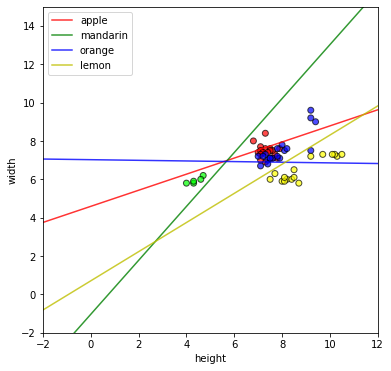

In [8]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(6,6))
colors = ['r', 'g', 'b', 'y']
cmap_fruits = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#FFFF00'])

plt.scatter(X_fruits_2d[['height']], X_fruits_2d[['width']],
           c=y_fruits_2d, cmap=cmap_fruits, edgecolor = 'black', alpha=.7)

x_0_range = np.linspace(-10, 15)

for w, b, color in zip(clf.coef_, clf.intercept_, ['r', 'g', 'b', 'y']):
    # Since class prediction with a linear model uses the formula y = w_0 x_0 + w_1 x_1 + b, 
    # and the decision boundary is defined as being all points with y = 0, to plot x_1 as a 
    # function of x_0 we just solve w_0 x_0 + w_1 x_1 + b = 0 for x_1:
    plt.plot(x_0_range, -(x_0_range * w[0] + b) / w[1], c=color, alpha=.8)
    
plt.legend(target_names_fruits)
plt.xlabel('height')
plt.ylabel('width')
plt.xlim(-2, 12)
plt.ylim(-2, 15)
plt.show()